In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/trainDM.csv
/kaggle/input/testDM.csv
/kaggle/input/sample_submission.csv


In [2]:

# Importing the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
# importing Keras and required libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam

In [4]:
import pandas as pd
sample_submission = pd.read_csv("../input/sample_submission.csv")
testDM = pd.read_csv("../input/testDM.csv")
trainDM = pd.read_csv("../input/trainDM.csv")

In [5]:
sample_submission.head()


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
testDM.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
trainDM.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = trainDM.iloc[:, 0:1].values

In [9]:
X = trainDM.iloc[:, 1:].values

In [10]:
X = X/255.0
testDM = testDM.values/255.0

In [11]:
X = X.reshape(-1, 28, 28, 1)

In [12]:
testDM = testDM.reshape(-1, 28, 28, 1)

In [13]:
encoder = OneHotEncoder(categorical_features=[0])
y = encoder.fit_transform(y).toarray()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [53]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

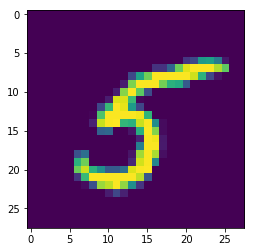

In [15]:
plt.imshow(X_train[1][:,:,0])
plt.show()

In [16]:
# Building the convolutional neural network

classifier = Sequential()

# Adding the first 2 convolution layer

classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the second 2 convolution layer

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling layer

classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the flattening layer

classifier.add(Flatten())

# Adding the ANN

classifier.add(Dense(units=300, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=150, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=10, activation='softmax'))

In [17]:
# Dynamic Reduction of Learning rate when accuracy reaches plateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.25, patience=2, min_lr=0.0001)

In [18]:

# Compiling the ANN

classifier.compile(optimizer=Adam(lr=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the CNN on DATASET using the keras documentation

train_datagen = ImageDataGenerator(shear_range=0.2,
                                   zoom_range=0.2,
                                   height_shift_range=.1,
                                   rotation_range=10,
                                   width_shift_range=.1)

train_datagen.fit(X_train)

In [19]:
# Fitting the Generator on Network

history = classifier.fit_generator(
        train_datagen.flow(X_train,y_train, batch_size=100),
        steps_per_epoch=X_train.shape[0] // 40,
        epochs=2,
        validation_data=(X_test,y_test),callbacks=[reduce_lr])

Epoch 1/2
945/945 [==============================] - 122s 129ms/step - loss: 0.2131 - accuracy: 0.9324 - val_loss: 0.0292 - val_accuracy: 0.9900
Epoch 2/2
945/945 [==============================] - 122s 129ms/step - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.0377 - val_accuracy: 0.9898


In [20]:
# Prediction

submission = classifier.predict(testDM)

# Maximum Probability Index

submission = np.argmax(submission, axis = 1)
submission = pd.Series(submission,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)

submission.to_csv("cnn_mnist.csv",index=False)

In [21]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [22]:
type (history)

keras.callbacks.callbacks.History

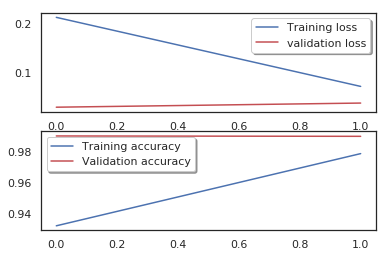

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(trainDM)
#test_x = scaler.fit_transform(test)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_x)

In [67]:
data = principalComponents
principalDf = pd.DataFrame(data, columns = ['principalcomponent1', 'principalcomponent2'])

In [69]:
label = pd.DataFrame(data = trainDM['label'])
principalDf = pd.concat([principalDf,label],axis = 1,ignore_index=True)

principalDf.columns = ["principalcomponent1", "principalcomponent2", "label"] 


In [70]:
principalDf.head()

,principalcomponent1,principalcomponent2,label
0,-5.012879,-5.499223,1
1,19.331399,6.018502,0
2,-7.535706,-1.959229,1
3,-0.477559,5.716017,4
4,26.602757,6.049552,0


In [71]:
print(pca.components_)

[[-4.66484187e-02 -1.99228314e-20  2.91096740e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 5.20781600e-02 -3.87408220e-18  1.56035556e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [72]:
print(pca.explained_variance_)

[40.78210833 29.18495499]


<Figure size 1440x1440 with 0 Axes>

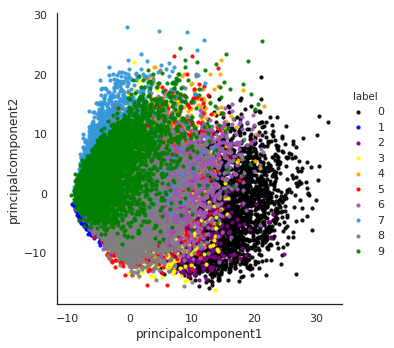

<Figure size 1440x1440 with 0 Axes>

In [114]:
colour = ['black', 'blue', 'purple', 'yellow', 'orange', 'red', "#9b59b6", "#3498db", "gray", 'green']
sns.set_palette(colour)
sns.lmplot( x="principalcomponent1", y="principalcomponent2", data=principalDf, fit_reg=False,
           scatter_kws={"alpha":0.9,"s":10}, hue='label', legend=True)

plt.figure(figsize=(20,20))